In [15]:
import os
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model, Sequential, save_model, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn import metrics

In [5]:
train_dataset = os.path.join('train')
test_dataset = os.path.join('test')

def preprocess_input_vgg(x):
    x = preprocess_input(x)
    return x

# Configuração do gerador de dados para pré-processamento e aumento de dados
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input_vgg,
    rescale=1./255,         # Normaliza os valores dos pixels para o intervalo [0, 1]
    #shear_range=0.2,        # Aplica corte aleatório
    #zoom_range=0.2,         # Aplica zoom aleatório
    #horizontal_flip=True,   # Inverte aleatoriamente as imagens horizontalmente
)

# Carrega e pré-processa as imagens de treinamento
train_generator = datagen.flow_from_directory(
    train_dataset,
    target_size=(224, 224),  # Tamanho das imagens esperado pela InceptionV3
    batch_size=32,
    class_mode='categorical', # 'categorical' se for classificação com mais de duas classes
    #subset='training'        # Especifica se é para conjunto de treinamento
)

# Carrega e pré-processa as imagens de validação
test_generator = datagen.flow_from_directory(
    test_dataset,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    #subset='validation'      # Especifica se é para conjunto de validação
)

Found 18325 images belonging to 10 classes.
Found 7854 images belonging to 10 classes.


In [6]:
# base_model = InceptionV3(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
base_model = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

# y_train_one_hot = to_categorical(train_generator, num_classes=10)

# for layer in base_model.layers:
#     layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Cria um novo modelo com as camadas personalizadas
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Substitua X_train e y_train pelos seus dados de treinamento e rótulos
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=test_generator)

Epoch 1/20
573/573 [==============================] - 1680s 3s/step - loss: 1.9162 - accuracy: 0.3481 - val_loss: 1.3681 - val_accuracy: 0.5872
Epoch 2/20
573/573 [==============================] - 1719s 3s/step - loss: 1.3741 - accuracy: 0.5516 - val_loss: 1.0061 - val_accuracy: 0.6963
Epoch 3/20
573/573 [==============================] - 1668s 3s/step - loss: 1.0985 - accuracy: 0.6385 - val_loss: 0.8164 - val_accuracy: 0.7634
Epoch 4/20
573/573 [==============================] - 1649s 3s/step - loss: 0.9344 - accuracy: 0.6965 - val_loss: 0.7005 - val_accuracy: 0.7997
Epoch 5/20
573/573 [==============================] - 1666s 3s/step - loss: 0.8172 - accuracy: 0.7356 - val_loss: 0.6234 - val_accuracy: 0.8158
Epoch 6/20
573/573 [==============================] - 1675s 3s/step - loss: 0.7303 - accuracy: 0.7627 - val_loss: 0.5652 - val_accuracy: 0.8309
Epoch 7/20
573/573 [==============================] - 1665s 3s/step - loss: 0.6536 - accuracy: 0.7898 - val_loss: 0.5199 - val_accuracy:

In [17]:
target_names = ['Aranha', 'Borboleta', 'Cachorro', 'Cavalo', 'Elefante', 'Esquilo', 'Galinha', 'Gato', 'Ovelha', 'Vaca']
test_generator.reset()
predictions = model.predict(test_generator)

y_pred_array = np.argmax(predictions, axis=1)

# y_pred = np.argmax(y_pred_array, axis=1)
# test_generator
y_true = test_generator.classes
# report = classification_report(y_true, y_pred_array, target_names=target_names)
# print(report)

246/246 [==============================] - 592s 2s/step


In [16]:
print("Accuracy:", metrics.accuracy_score(y_pred_array, y_true))
print("F1-score:", metrics.f1_score(y_pred_array, y_true, average='micro'))
print("Precision:", metrics.precision_score(y_pred_array, y_true, average='micro'))
print("Recall:", metrics.recall_score(y_pred_array, y_true, average='micro'))

Accuracy: 0.11688311688311688
F1-score: 0.11688311688311688
Precision: 0.11688311688311688
Recall: 0.11688311688311688


In [9]:
print(y_pred_array[0])
print(y_true[0])
test_generator.classes[0]

2
0


0

In [9]:
y_pred_array[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

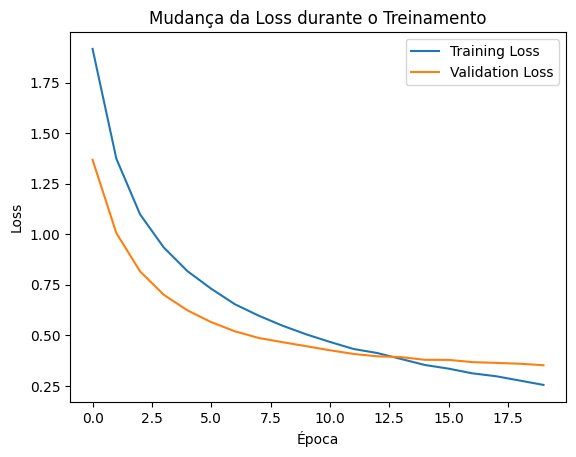

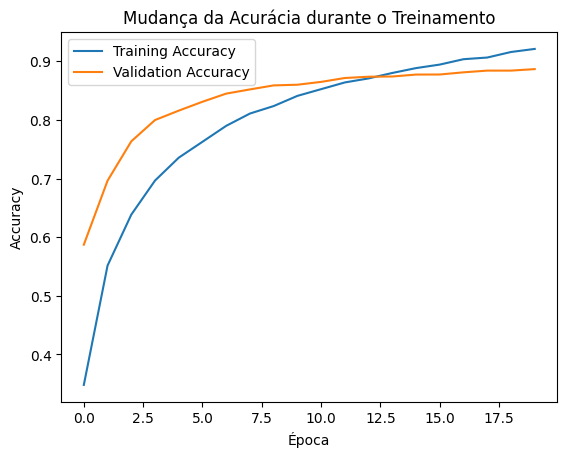

In [7]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']

# plt.ylim(0, 0.5)
# plt.yticks(np.arange(0, 0.5, 0.1))

# Plotagem da loss
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Mudança da Loss durante o Treinamento')
plt.legend()
plt.show()
# Plotagem da accuracy
plt.plot(accuracy_values, label='Training Accuracy')
plt.plot(val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Mudança da Acurácia durante o Treinamento')
plt.legend()
plt.show()

In [ ]:
model.save('modelo.h5')